In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display

## 3a)

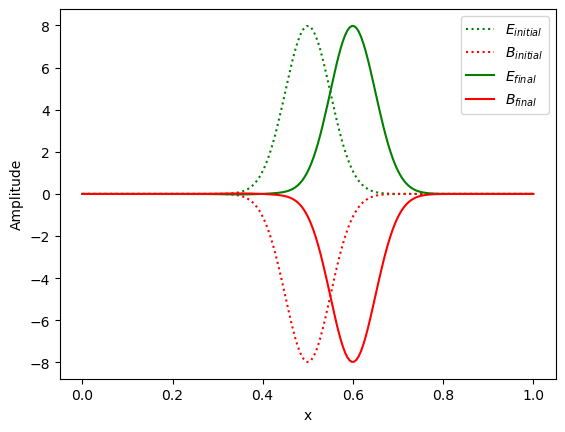

In [2]:
# define 1D grid
N = 200
dx = 1/N
x = np.linspace(0,1,N)

nsteps = 200
alpha = 0.1
dt = alpha*dx


def gauss(x , mean , sd, sign):
    return sign / (np.sqrt(2 *np.pi) *sd) * np.exp(-0.5*((x-mean)/sd)**2)


def Propagate(B0,E0,refract,nsteps):
    B = np.empty((nsteps,N))
    E = np.empty((nsteps,N))
    B[0] = B0
    E[0] = E0
    B[1] = B[0] - dt/dx*(np.roll(E[0],1)-np.roll(E[0],-1))
    E[1] = E[0] - dt/dx*(np.roll(B[0],1)-np.roll(B[0],-1))/refract**2
    for i in range(nsteps-2):
        n = i+1
        B[n+1] = B[n-1] - dt/dx*(np.roll(E[n],1)-np.roll(E[n],-1))
        E[n+1] = E[n-1] - dt/dx*(np.roll(B[n],1)-np.roll(B[n],-1))/refract**2
    return B,E

refract = np.ones(N)
B0 = gauss(x,0.5,0.05,sign = -1)
E0 = gauss(x,0.5,0.05,sign = 1)

B,E = Propagate(B0,E0,refract,nsteps)
    
plt.plot(x,E[0],'g:',label='$E_{initial}$')
plt.plot(x,B[0],'r:',label='$B_{initial}$')
plt.plot(x,E[-1],'g',label='$E_{final}$')
plt.plot(x,B[-1],'r',label='$B_{final}$')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()

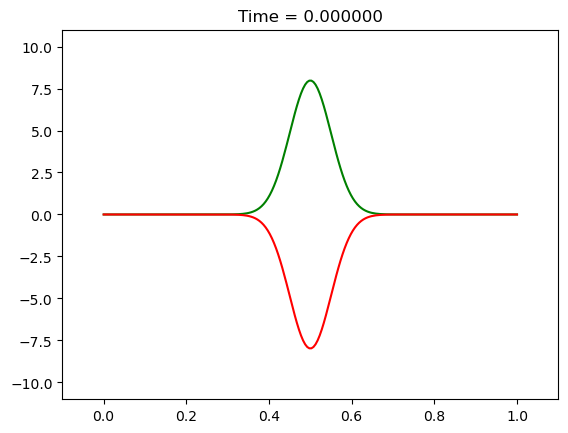

In [3]:
# Video
fig, ax = plt.subplots()

s = 5 # we'll skip every sth frame

def update(frame2):
    plt.cla()
    plt.xlim(-0.1, 1.1)
    plt.ylim(np.min(B)-3, np.max(E)+3)
    
    frame = frame2*s 
    t = frame * dt
    Electric = ax.plot(x,E[frame],color='g')
    Magnetic = ax.plot(x,B[frame],color='r')
    ax.set_title('Time = %f'%t)
    
    return Electric, Magnetic

ani = FuncAnimation(fig=fig, func=update, frames=int(nsteps/s)-1)
display(HTML(ani.to_jshtml()))

The E and B fields propogate without changing shape. Now we test out what happens if $B$ and $E$ have the same amplitude sign.

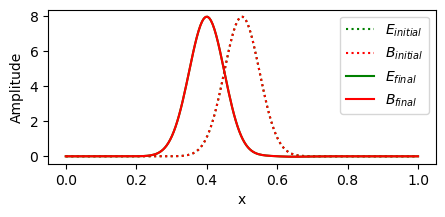

In [4]:
refract = np.ones(N)
B0 = gauss(x,0.5,0.05,sign = 1)
E0 = gauss(x,0.5,0.05,sign = 1)

B,E = Propagate(B0,E0,refract,nsteps)

plt.figure(figsize=(5,2))
plt.plot(x,E[0],'g:',label='$E_{initial}$')
plt.plot(x,B[0],'r:',label='$B_{initial}$')
plt.plot(x,E[-1],'g',label='$E_{final}$')
plt.plot(x,B[-1],'r',label='$B_{final}$')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()

All that changes when the amplitude is switched is the direction of propagation.

Opposite amplitudes means that the pulse propagates to the right.

Same sign amplitudes means that the pulse propagates to the left.

# b)

Now we test out a different index of refraction and calculate transmission and reflection coefficients.

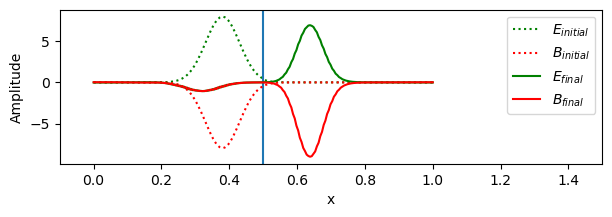

In [5]:
# define 1D grid
N = 200
dx = 1/N
x = np.linspace(0,1,N)

nsteps = 400
alpha = 0.1
dt = alpha*dx

n1 = 1.
n2 = 1.3

refract = np.ones(N)*n1
refract[int(N/2):] = n2
nsteps = 600


B0 = gauss(x,0.38,0.05,sign = 1)*-1
E0 = -1*B0/refract

B,E = Propagate(B0,E0,refract,nsteps)

plt.figure(figsize=(7,2))
plt.plot(x,E[0],'g:',label='$E_{initial}$')
plt.axvline(0.5)
plt.xlim(-0.1,1.5)
plt.plot(x,B[0],'r:',label='$B_{initial}$')
plt.plot(x,E[-1],'g',label='$E_{final}$')
plt.plot(x,B[-1],'r',label='$B_{final}$')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()

Now we calculate reflection and transmission coefficients and see if they match the theoretical values.

In [6]:
t = 2*n1/(n2+n1)
r = (n2-n1)/(n2+n1)
print('for n1 = ',n1,',  n2 = ',n2)
print('Theoretical: r = ', r)
print('           : t = ', t)

print('Actual reflection and transmission coefficients are:')

E_reflected = E[-1][:int(N/2)]
E_transmitted = E[-1][int(N/2):]
B_reflected = B[-1][:int(N/2)]
B_transmitted = B[-1][int(N/2):]

r_actual_B = np.max(abs(B_reflected))/np.max(abs(B[0]))
t_actual_B = np.max(abs(B_transmitted))/np.max(abs(B[0]))
print('B:    r = ', r_actual_B)
print('      t = ', t_actual_B)

r_actual_E = np.max(abs(E_reflected))/np.max(abs(E[0]))
t_actual_E = np.max(abs(E_transmitted))/np.max(abs(E[0]))

print('E:    r = ', r_actual_E)
print('      t = ', t_actual_E)

for n1 =  1.0 ,  n2 =  1.3
Theoretical: r =  0.13043478260869568
           : t =  0.8695652173913044
Actual reflection and transmission coefficients are:
B:    r =  0.13307870293777718
      t =  1.1322417169696593
E:    r =  0.13344999176870664
      t =  0.8706327851029401


We see that the equations for transmission and reflection coefficients are satisfied for electric fields, but not quite for magnetic fields. The amplitude of the transmitted magnetic field is larger than what came in. We also see that the speed of propogation slows down once the wave enters an environment with a higher index of refraction. Below is a video.

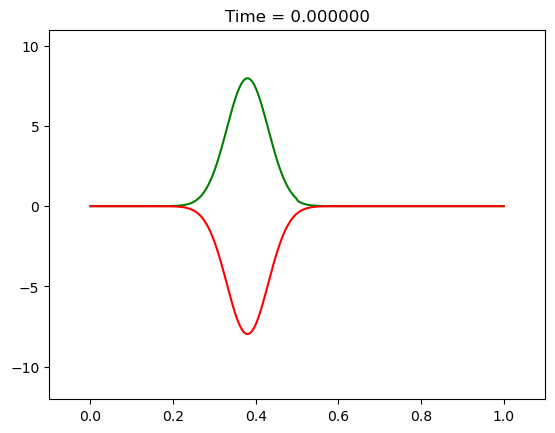

In [7]:
# Video
fig, ax = plt.subplots()

s = 5 # we'll skip every sth frame

ani = FuncAnimation(fig=fig, func=update, frames=int(nsteps/s)-1)
display(HTML(ani.to_jshtml()))